In [34]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcudnn8 is already the newest version (8.1.0.77-1+cuda11.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [35]:
#importing libraries for basic operations
import pandas as pd
import numpy as np

#importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#importing libraries for building and training models 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Q1:Implement the AlexNet architecture. Train, test and report the performance of this model on the Cats_and_Dogs_Dataset.

In [9]:
#Defining AlexNet architecture
def AlexNet(ipx,classes):
  AlexNet = Sequential()
  #1st Convolutional Layer
  AlexNet.add(Conv2D(filters=96, input_shape=ipx, kernel_size=(11,11), strides=(4,4), padding='same'))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))
  AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
  
  #2nd Convolutional Layer
  AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))
  AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

  #3rd Convolutional Layer
  AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))

  #4th Convolutional Layer
  AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))

  #5th Convolutional Layer
  AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))
  AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

  #Passing it to a Fully Connected layer
  AlexNet.add(Flatten())
  # 1st Fully Connected Layer
  AlexNet.add(Dense(4096, input_shape=ipx))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))
  # Add Dropout to prevent overfitting
  AlexNet.add(Dropout(0.4))

  #2nd Fully Connected Layer
  AlexNet.add(Dense(4096))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))
  #Add Dropout to prevent overfitting
  AlexNet.add(Dropout(0.4))

  #3rd Fully Connected Layer
  AlexNet.add(Dense(1000))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))
  #Add Dropout to prevent overfitting
  AlexNet.add(Dropout(0.4))

  #Output Layer
  AlexNet.add(Dense(classes))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('softmax'))

  return AlexNet

In [10]:
#Defining plot for AlexNet

def plot1(AlexNet) : 
  import matplotlib.pyplot as plt
  #Plotting the training and validation loss

  f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

  #Assigning the first subplot to graph training loss and validation loss
  ax[0].plot(AlexNet.history.history['loss'],color='b',label='Training Loss')
  ax[0].plot(AlexNet.history.history['val_loss'],color='r',label='Validation Loss')
  ax[0].set_title("loss vs val_loss")

  #Plotting the training accuracy and validation accuracy
  ax[1].plot(AlexNet.history.history['accuracy'],color='b',label='Training  Accuracy')
  ax[1].plot(AlexNet.history.history['val_accuracy'],color='r',label='Validation Accuracy')
  ax[1].set_title("acc vs val_acc")

  plt.legend()

## Cats_and_Dogs

Metadata:
A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.

In [11]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-28 16:53:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 142.251.163.128, 172.217.15.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   290MB/s    in 0.2s    

2022-08-28 16:53:37 (290 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [12]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [13]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [15]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [16]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [17]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.930.jpg', 'cat.649.jpg', 'cat.458.jpg', 'cat.205.jpg', 'cat.78.jpg', 'cat.901.jpg', 'cat.303.jpg', 'cat.732.jpg', 'cat.593.jpg', 'cat.687.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


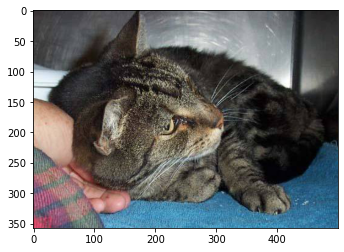

In [18]:
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))

In [19]:
px = (224,224,3)
classes = 2
Alexnet_CatsNDogs = AlexNet(px,classes)

In [20]:
#printing the model summary
Alexnet_CatsNDogs.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 96)       384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 256)      1

In [21]:
#compiling the model
Alexnet_CatsNDogs.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [22]:
#fitting the model
history1 = Alexnet_CatsNDogs.fit(train_generator,steps_per_epoch = 100,epochs=10,validation_data = validation_generator,validation_steps = 50,verbose=1)

Epoch 1/10
100/100 [==============================] - 18s 113ms/step - loss: 0.6853 - accuracy: 0.5865 - val_loss: 1.1963 - val_accuracy: 0.5050
Epoch 2/10
100/100 [==============================] - 11s 110ms/step - loss: 0.6358 - accuracy: 0.6370 - val_loss: 1.0190 - val_accuracy: 0.5480
Epoch 3/10
100/100 [==============================] - 12s 120ms/step - loss: 0.6321 - accuracy: 0.6420 - val_loss: 0.7827 - val_accuracy: 0.5760
Epoch 4/10
100/100 [==============================] - 11s 110ms/step - loss: 0.5959 - accuracy: 0.6820 - val_loss: 0.8125 - val_accuracy: 0.6450
Epoch 5/10
100/100 [==============================] - 11s 113ms/step - loss: 0.5720 - accuracy: 0.7110 - val_loss: 0.9989 - val_accuracy: 0.5690
Epoch 6/10
100/100 [==============================] - 12s 118ms/step - loss: 0.5505 - accuracy: 0.7225 - val_loss: 0.6750 - val_accuracy: 0.6400
Epoch 7/10
100/100 [==============================] - 11s 110ms/step - loss: 0.5145 - accuracy: 0.7475 - val_loss: 1.3727 - val_ac

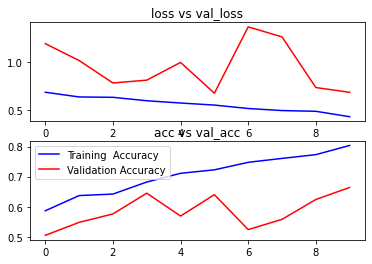

In [23]:
#plotting the loss and accuracy curves
plot1(Alexnet_CatsNDogs)

Q2:Train, test and report the performances using the following models on the 
Cats_and_Dogs_Dataset
* VGG-16
* GoogleNet
* ResNet50
* EfficientNetB0
* MobileNetV2

In [24]:
#Importing all the model libraries
from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet import ResNet50
from keras.applications.efficientnet import EfficientNetB0
from keras.applications.mobilenet_v2 import MobileNetV2

In [68]:
def plot2(model) : 
  import matplotlib.pyplot as plt
  #Plotting the training and validation loss

  f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

  #Assigning the first subplot to graph training loss and validation loss
  ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
  ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')
  ax[0].set_title("loss vs val_loss")
  plt.legend()

  #Plotting the training accuracy and validation accuracy
  ax[1].plot(model.history.history['acc'],color='b',label='Training  Accuracy')
  ax[1].plot(model.history.history['val_acc'],color='r',label='Validation Accuracy')
  ax[1].set_title("acc vs val_acc")
  plt.legend()
  
# VGG16
def vgg16_model():
  base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False #freeze the layers
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
  ])
  #printing model summary
  model.summary()
  #compiling the model
  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
  return model

#fitting the model
def model_fit(model):
  history = model.fit(
  train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)
  
  return history

#Googlenet
def google_model():
  base_model = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False #freeze the layers
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
  ])
  #printing model summary
  model.summary()
  #compiling the model
  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
  return model
  
#RESnet
def res_model():
  base_model = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False #freeze the layers
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
  ])
  #printing model summary
  model.summary()
  #compiling the model
  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
  return model

#EfficientnetB0
def eff_model():
  base_model = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False #freeze the layers
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
  ])
  #printing model summary
  model.summary()
  #compiling the model
  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
  return model

#Mobilenet
def mobile_model():
  base_model = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False #freeze the layers
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
  ])
  #printing model summary
  model.summary()
  #compiling the model
  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
  return model

In [26]:
#VGG16 model
model1_vgg16 = vgg16_model()

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [27]:
#fitting the model
history2 = model_fit(model1_vgg16)

Epoch 1/5
100/100 [==============================] - 23s 204ms/step - loss: 0.4667 - acc: 0.7900 - val_loss: 0.3325 - val_acc: 0.8630
Epoch 2/5
100/100 [==============================] - 19s 190ms/step - loss: 0.2745 - acc: 0.9100 - val_loss: 0.2851 - val_acc: 0.8880
Epoch 3/5
100/100 [==============================] - 19s 191ms/step - loss: 0.2163 - acc: 0.9310 - val_loss: 0.2521 - val_acc: 0.9000
Epoch 4/5
100/100 [==============================] - 23s 232ms/step - loss: 0.1798 - acc: 0.9505 - val_loss: 0.2393 - val_acc: 0.8990
Epoch 5/5
100/100 [==============================] - 19s 189ms/step - loss: 0.1515 - acc: 0.9565 - val_loss: 0.2294 - val_acc: 0.9060


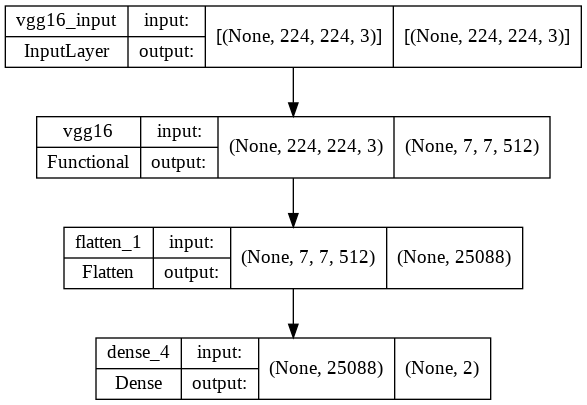

In [28]:
#Plotting the model
plot_model(model1_vgg16,  show_shapes=True, show_layer_names=True)

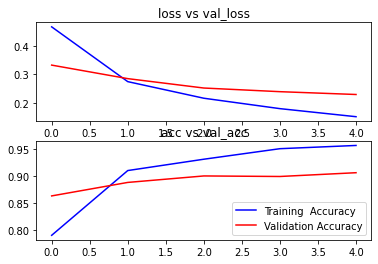

In [69]:
#plotting the loss and accuracy curves
plot2(model1_vgg16)

In [30]:
#GoogleNet Architecture
model1_google = google_model()

87924736/87910968 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_5 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [31]:
#fitting the model
history3 = model_fit(model1_google)

Epoch 1/5
100/100 [==============================] - 18s 129ms/step - loss: 0.0957 - acc: 0.9690 - val_loss: 0.1410 - val_acc: 0.9610
Epoch 2/5
100/100 [==============================] - 12s 116ms/step - loss: 0.0121 - acc: 0.9955 - val_loss: 0.0449 - val_acc: 0.9840
Epoch 3/5
100/100 [==============================] - 12s 117ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0497 - val_acc: 0.9840
Epoch 4/5
100/100 [==============================] - 12s 116ms/step - loss: 8.7203e-04 - acc: 1.0000 - val_loss: 0.0435 - val_acc: 0.9850
Epoch 5/5
100/100 [==============================] - 12s 117ms/step - loss: 5.9675e-04 - acc: 1.0000 - val_loss: 0.0425 - val_acc: 0.9860


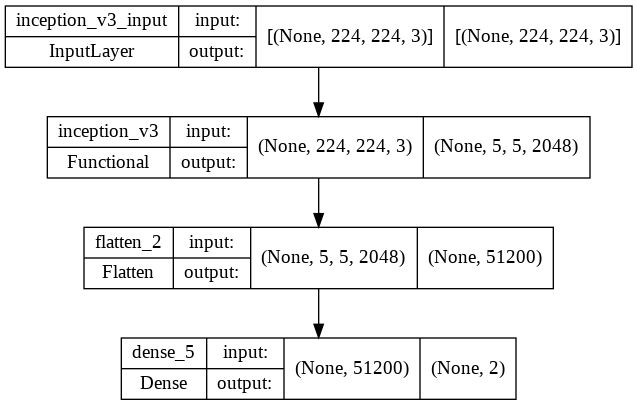

In [32]:
#Plotting the model
plot_model(model1_google,  show_shapes=True, show_layer_names=True)

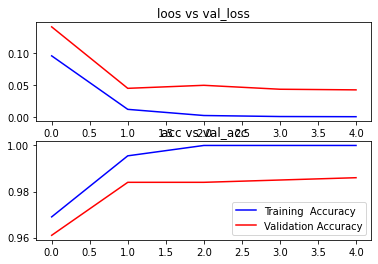

In [33]:
#plotting the loss and accuracy curves
plot2(model1_google)

In [36]:
#ResNet50 Architecture
model1_res=res_model()

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [37]:
#Fitting the model
history4 = model_fit(model1_res)

Epoch 1/5
100/100 [==============================] - 23s 135ms/step - loss: 0.6753 - acc: 0.5945 - val_loss: 0.6761 - val_acc: 0.5850
Epoch 2/5
100/100 [==============================] - 15s 152ms/step - loss: 0.6712 - acc: 0.6150 - val_loss: 0.6387 - val_acc: 0.6510
Epoch 3/5
100/100 [==============================] - 16s 155ms/step - loss: 0.6128 - acc: 0.6650 - val_loss: 0.6662 - val_acc: 0.6040
Epoch 4/5
100/100 [==============================] - 15s 148ms/step - loss: 0.5990 - acc: 0.6615 - val_loss: 0.6186 - val_acc: 0.6630
Epoch 5/5
100/100 [==============================] - 17s 166ms/step - loss: 0.6002 - acc: 0.6685 - val_loss: 0.6059 - val_acc: 0.6820


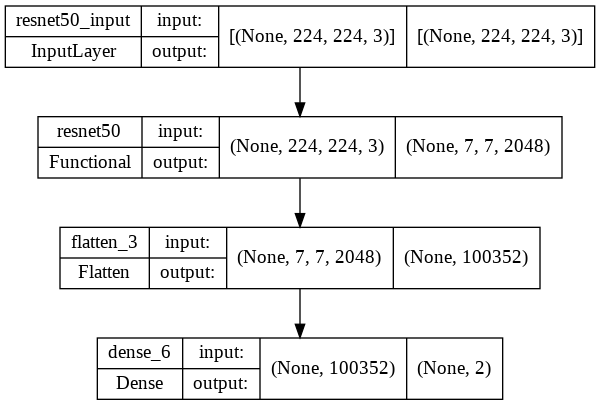

In [38]:
#Plotting the model
plot_model(model1_res,  show_shapes=True, show_layer_names=True)

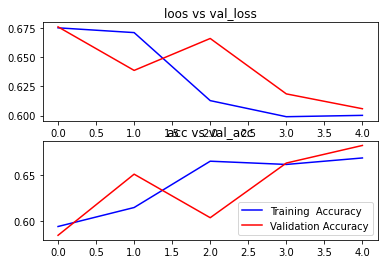

In [39]:
#plotting the loss and accuracy curves
plot2(model1_res)

In [40]:
#EfficientNetB0
model1_eff = eff_model()

16719872/16705208 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_7 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


In [41]:
#fitting the model
history5 = model_fit(model1_eff)

Epoch 1/5
100/100 [==============================] - 19s 128ms/step - loss: 0.7810 - acc: 0.5070 - val_loss: 0.7100 - val_acc: 0.5000
Epoch 2/5
100/100 [==============================] - 12s 119ms/step - loss: 0.7214 - acc: 0.5095 - val_loss: 0.6969 - val_acc: 0.5000
Epoch 3/5
100/100 [==============================] - 11s 113ms/step - loss: 0.7227 - acc: 0.5055 - val_loss: 0.9146 - val_acc: 0.5000
Epoch 4/5
100/100 [==============================] - 11s 112ms/step - loss: 0.7325 - acc: 0.5015 - val_loss: 0.7163 - val_acc: 0.5000
Epoch 5/5
100/100 [==============================] - 14s 144ms/step - loss: 0.7171 - acc: 0.5010 - val_loss: 0.7075 - val_acc: 0.5000


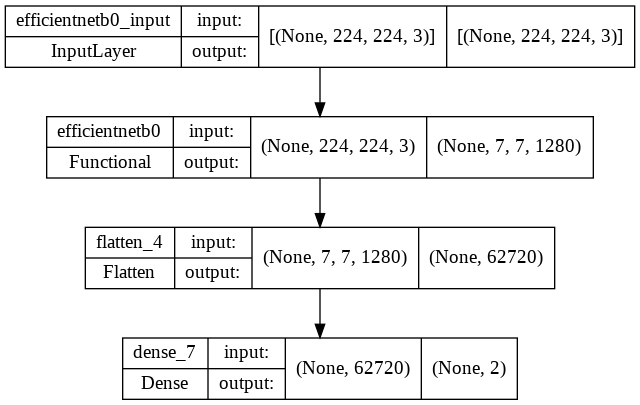

In [42]:
##Plotting the model
plot_model(model1_eff,  show_shapes=True, show_layer_names=True)

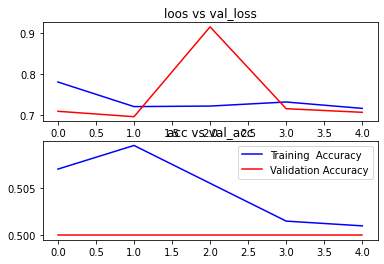

In [43]:
#plotting the loss and accuracy curves
plot2(model1_eff)

In [44]:
#MobileNetV2
model1_mobile = mobile_model()

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_5 (Flatten)         (None, 62720)             0         
                                                                 
 dense_8 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


In [45]:
#fitting the model
history6 = model_fit(model1_mobile)

Epoch 1/5
100/100 [==============================] - 14s 114ms/step - loss: 0.1513 - acc: 0.9510 - val_loss: 0.1318 - val_acc: 0.9630
Epoch 2/5
100/100 [==============================] - 11s 108ms/step - loss: 0.0129 - acc: 0.9945 - val_loss: 0.0926 - val_acc: 0.9770
Epoch 3/5
100/100 [==============================] - 11s 109ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0923 - val_acc: 0.9790
Epoch 4/5
100/100 [==============================] - 14s 137ms/step - loss: 6.4666e-04 - acc: 1.0000 - val_loss: 0.0930 - val_acc: 0.9790
Epoch 5/5
100/100 [==============================] - 11s 109ms/step - loss: 4.8718e-04 - acc: 1.0000 - val_loss: 0.0932 - val_acc: 0.9770


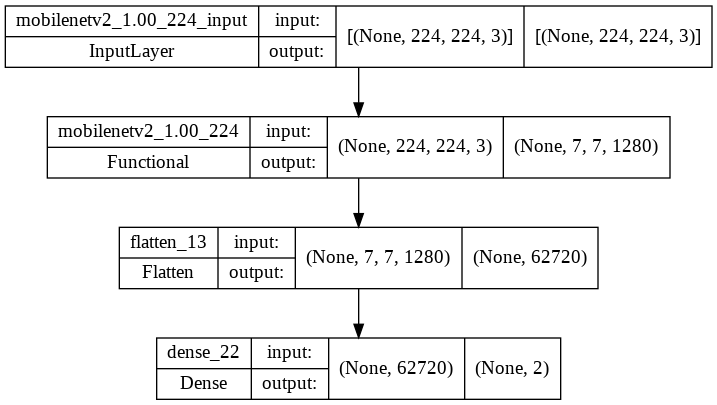

In [95]:
#plotting the model
plot_model(model1_mobile,  show_shapes=True, show_layer_names=True)

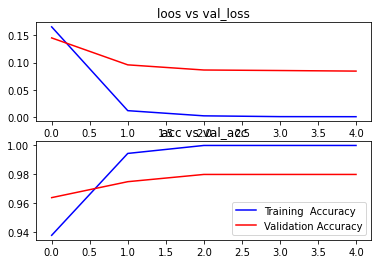

In [96]:
#plotting the loss and accuracy curves
plot2(model1_mobile)

Inferences:
1. The training accuracies of the models are:
* AlexNet  ->0.8035
* VGG-16   -> 0.9565
* GoogleNet->1.0000
* ResNet50 ->0.6685
* EfficientNetB0  ->0.5010
* MobileNetV2     -> 1.0000

2. GoogleNet and MobileNetV2 are clearly overfitting the given dataset as can
be observed from the plots as well as their accuracy scores.

3. VGG-16 is performing better than AlexNet.

4. The model having lowest accuracy is EfficientNetB0





## Horse2Zebra

Metadata:
Horse2zebra dataset consists of 1187 Horse & 1474 Zebra Images. Images in both the domains are split into train and test subsets.

In [46]:
 !wget --no-check-certificate \
    https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip \
    -O /tmp/horse_zebra.zip

--2022-08-28 17:31:58--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.244.190
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116867962 (111M) [application/zip]
Saving to: ‘/tmp/horse_zebra.zip’

/tmp/horse_zebra.zi 100%[===================>] 111.45M  34.6MB/s    in 3.2s    

2022-08-28 17:32:01 (34.6 MB/s) - ‘/tmp/horse_zebra.zip’ saved [116867962/116867962]



In [47]:
import os
import zipfile

local_zip = '/tmp/horse_zebra.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [48]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [49]:
base_dir = '/tmp/horse2zebra'
!mkdir /tmp/horse2zebra/train
!mkdir /tmp/horse2zebra/test
!mv /tmp/horse2zebra/trainA /tmp/horse2zebra/train
!mv /tmp/horse2zebra/trainB /tmp/horse2zebra/train
!mv /tmp/horse2zebra/testA /tmp/horse2zebra/test
!mv /tmp/horse2zebra/testB /tmp/horse2zebra/test
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_horse_dir = os.path.join(train_dir, 'trainA')

# Directory with our training dog pictures
train_zebra_dir = os.path.join(train_dir, 'trainB')

# Directory with our validation cat pictures
validation_horse_dir = os.path.join(validation_dir, 'testA')

# Directory with our validation dog pictures
validation_zebradir = os.path.join(validation_dir, 'testB')

In [50]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [51]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 260 images belonging to 2 classes.


In [52]:
train_horse_fnames = os.listdir(train_horse_dir)
print(train_horse_fnames[:10])

train_zebra_fnames = os.listdir(train_zebra_dir)
train_zebra_fnames.sort()
print(train_zebra_fnames[:10])

['n02381460_4094.jpg', 'n02381460_1083.jpg', 'n02381460_525.jpg', 'n02381460_7689.jpg', 'n02381460_541.jpg', 'n02381460_8435.jpg', 'n02381460_1586.jpg', 'n02381460_314.jpg', 'n02381460_4783.jpg', 'n02381460_5408.jpg']
['n02391049_10007.jpg', 'n02391049_10027.jpg', 'n02391049_1004.jpg', 'n02391049_10047.jpg', 'n02391049_10063.jpg', 'n02391049_101.jpg', 'n02391049_1012.jpg', 'n02391049_10122.jpg', 'n02391049_10123.jpg', 'n02391049_10129.jpg']


Q1:Implement the AlexNet architecture. Train, test and report the performance of this model on the Horse2Zebra dataset.

In [53]:
px2 = (224,224,3)
classes = 2
Alexnet_Dogs2Zebra= AlexNet(px2,classes)
Alexnet_Dogs2Zebra.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 56, 56, 96)        34944     
                                                                 
 batch_normalization_103 (Ba  (None, 56, 56, 96)       384       
 tchNormalization)                                               
                                                                 
 activation_103 (Activation)  (None, 56, 56, 96)       0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 28, 28, 96)       0         
 2D)                                                             
                                                                 
 conv2d_100 (Conv2D)         (None, 28, 28, 256)       614656    
                                                                 
 batch_normalization_104 (Ba  (None, 28, 28, 256)     

In [54]:
#compiling the model
Alexnet_Dogs2Zebra.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [55]:
#fitting the model
history7 = Alexnet_Dogs2Zebra.fit(train_generator,steps_per_epoch = 100,epochs=10,validation_data = validation_generator,validation_batch_size = 30,verbose=1)

Epoch 1/10
100/100 [==============================] - 12s 105ms/step - loss: 0.4331 - accuracy: 0.8137 - val_loss: 1.9518 - val_accuracy: 0.4615
Epoch 2/10
100/100 [==============================] - 8s 75ms/step - loss: 0.3282 - accuracy: 0.8713 - val_loss: 0.9773 - val_accuracy: 0.5038
Epoch 3/10
100/100 [==============================] - 8s 80ms/step - loss: 0.2929 - accuracy: 0.8824 - val_loss: 0.5086 - val_accuracy: 0.7615
Epoch 4/10
100/100 [==============================] - 9s 87ms/step - loss: 0.2818 - accuracy: 0.8905 - val_loss: 1.1032 - val_accuracy: 0.5385
Epoch 5/10
100/100 [==============================] - 8s 76ms/step - loss: 0.2713 - accuracy: 0.8980 - val_loss: 0.9260 - val_accuracy: 0.7192
Epoch 6/10
100/100 [==============================] - 11s 114ms/step - loss: 0.2371 - accuracy: 0.9200 - val_loss: 1.3065 - val_accuracy: 0.5346
Epoch 7/10
100/100 [==============================] - 8s 79ms/step - loss: 0.2237 - accuracy: 0.9172 - val_loss: 1.7833 - val_accuracy: 0.

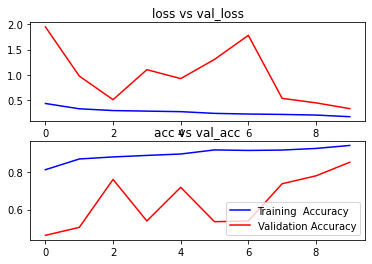

In [56]:
#plotting the loss and accuracy curves
plot1(Alexnet_Dogs2Zebra)

Q2:Train, test and report the performances using the following models on the 
Horse2Zebra dataset.
* VGG-16
* GoogleNet
* ResNet50
* EfficientNetB0
* MobileNetV2

In [57]:
#VGG16 architecture
model2_vgg16 = vgg16_model()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 25088)             0         
                                                                 
 dense_13 (Dense)            (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [58]:
#fitting the model
history8 = model2_vgg16.fit(
  train_generator,
      steps_per_epoch=100,  
      epochs=5,
      validation_data=validation_generator,
      validation_batch_size=30,  
      verbose=1)

Epoch 1/5
100/100 [==============================] - 17s 151ms/step - loss: 0.2962 - acc: 0.8915 - val_loss: 0.1694 - val_acc: 0.9615
Epoch 2/5
100/100 [==============================] - 14s 140ms/step - loss: 0.1522 - acc: 0.9505 - val_loss: 0.1261 - val_acc: 0.9692
Epoch 3/5
100/100 [==============================] - 14s 139ms/step - loss: 0.1191 - acc: 0.9652 - val_loss: 0.1102 - val_acc: 0.9692
Epoch 4/5
100/100 [==============================] - 14s 139ms/step - loss: 0.0992 - acc: 0.9753 - val_loss: 0.1040 - val_acc: 0.9654
Epoch 5/5
100/100 [==============================] - 14s 142ms/step - loss: 0.0803 - acc: 0.9778 - val_loss: 0.1035 - val_acc: 0.9615


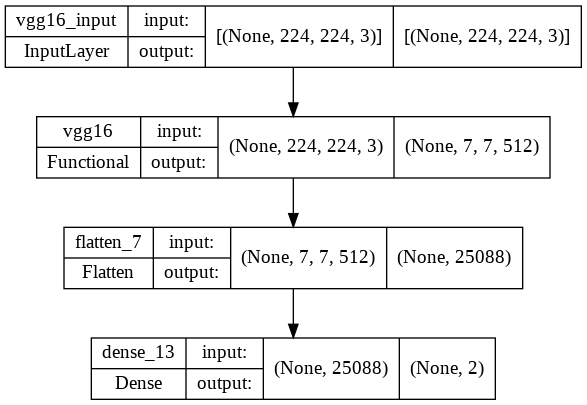

In [59]:
#plotting the model
plot_model(model2_vgg16,  show_shapes=True, show_layer_names=True)

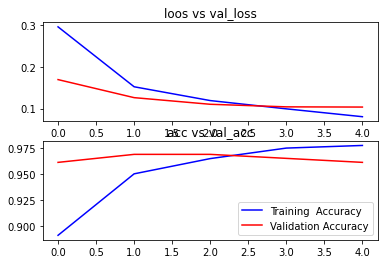

In [60]:
#plotting the loss and accuracy curves
plot2(model2_vgg16)

In [61]:
#GoogleNet Architecture
model2_google = google_model()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_8 (Flatten)         (None, 51200)             0         
                                                                 
 dense_14 (Dense)            (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [63]:
#fitting the model
history9 = model2_google.fit(
  train_generator,
      steps_per_epoch=100,  
      epochs=5,
      validation_data=validation_generator,
      validation_batch_size=30,  
      verbose=1)

Epoch 1/5
100/100 [==============================] - 13s 92ms/step - loss: 0.0733 - acc: 0.9727 - val_loss: 0.0636 - val_acc: 0.9885
Epoch 2/5
100/100 [==============================] - 9s 89ms/step - loss: 0.0226 - acc: 0.9939 - val_loss: 0.0644 - val_acc: 0.9885
Epoch 3/5
100/100 [==============================] - 10s 97ms/step - loss: 0.0067 - acc: 0.9975 - val_loss: 0.0657 - val_acc: 0.9846
Epoch 4/5
100/100 [==============================] - 9s 86ms/step - loss: 0.0029 - acc: 0.9995 - val_loss: 0.0657 - val_acc: 0.9885
Epoch 5/5
100/100 [==============================] - 9s 91ms/step - loss: 0.0018 - acc: 0.9995 - val_loss: 0.0696 - val_acc: 0.9885


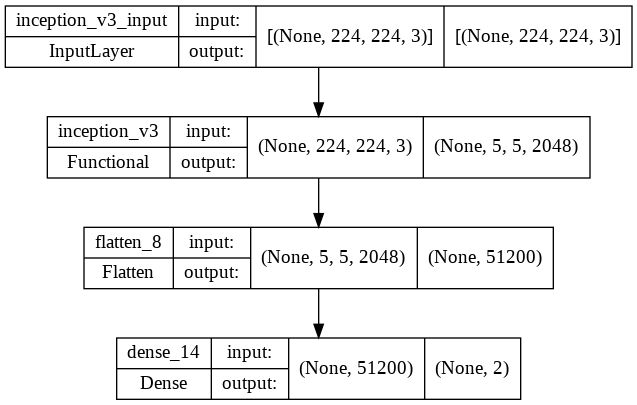

In [65]:
#plotting the model
plot_model(model2_google,  show_shapes=True, show_layer_names=True)

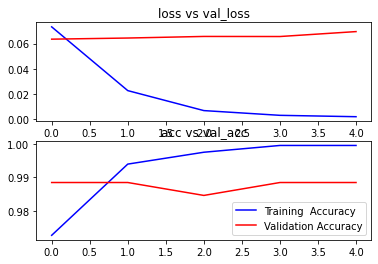

In [70]:
#plotting the loss and accuracy curves
plot2(model2_google)

In [71]:
#ResNet50 architecture
model2_res = res_model()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_9 (Flatten)         (None, 100352)            0         
                                                                 
 dense_15 (Dense)            (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [72]:
#fitting the model
history10 = model2_res.fit(
  train_generator,
      steps_per_epoch=100,  
      epochs=5,
      validation_data=validation_generator,
      validation_batch_size=30,  
      verbose=1)

Epoch 1/5
100/100 [==============================] - 13s 99ms/step - loss: 0.5609 - acc: 0.6951 - val_loss: 0.4312 - val_acc: 0.8077
Epoch 2/5
100/100 [==============================] - 9s 87ms/step - loss: 0.4274 - acc: 0.8077 - val_loss: 0.3808 - val_acc: 0.8423
Epoch 3/5
100/100 [==============================] - 9s 88ms/step - loss: 0.3881 - acc: 0.8238 - val_loss: 0.5000 - val_acc: 0.7038
Epoch 4/5
100/100 [==============================] - 9s 88ms/step - loss: 0.3801 - acc: 0.8339 - val_loss: 0.3957 - val_acc: 0.8231
Epoch 5/5
100/100 [==============================] - 9s 87ms/step - loss: 0.3711 - acc: 0.8213 - val_loss: 0.3545 - val_acc: 0.8577


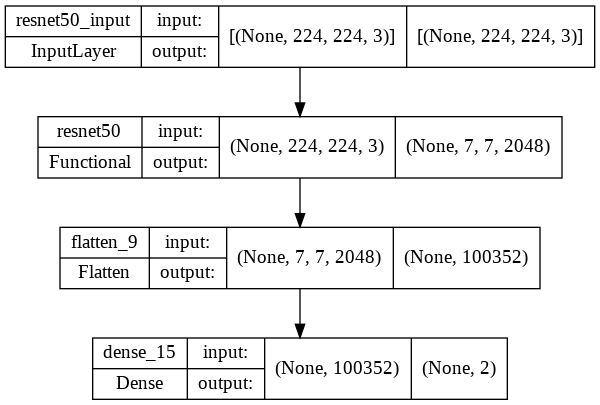

In [73]:
#plotting the model
plot_model(model2_res,  show_shapes=True, show_layer_names=True)

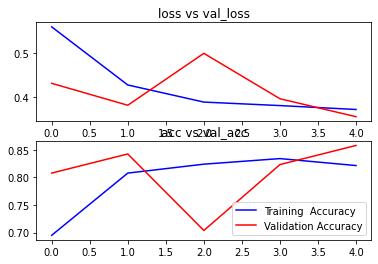

In [74]:
#plotting the loss and accuracy curves
plot2(model2_res)

In [75]:
#EfficientNetB0
model2_eff = eff_model()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_10 (Flatten)        (None, 62720)             0         
                                                                 
 dense_16 (Dense)            (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


In [76]:
#fitting the model
history11 = model2_eff.fit(
  train_generator,
      steps_per_epoch=100,  
      epochs=5,
      validation_data=validation_generator,
      validation_batch_size=30,  
      verbose=1)

Epoch 1/5
100/100 [==============================] - 14s 89ms/step - loss: 0.7134 - acc: 0.5331 - val_loss: 0.7888 - val_acc: 0.4615
Epoch 2/5
100/100 [==============================] - 7s 70ms/step - loss: 0.7322 - acc: 0.5103 - val_loss: 0.7177 - val_acc: 0.5385
Epoch 3/5
100/100 [==============================] - 7s 71ms/step - loss: 0.7735 - acc: 0.5270 - val_loss: 0.7690 - val_acc: 0.4615
Epoch 4/5
100/100 [==============================] - 7s 69ms/step - loss: 0.7849 - acc: 0.5209 - val_loss: 0.7715 - val_acc: 0.5385
Epoch 5/5
100/100 [==============================] - 7s 69ms/step - loss: 0.7502 - acc: 0.5194 - val_loss: 0.6934 - val_acc: 0.5385


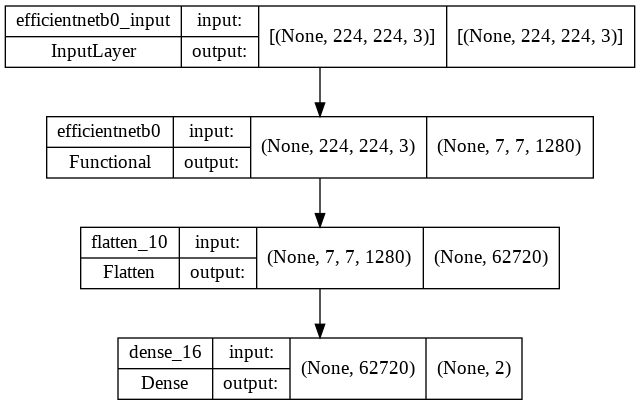

In [77]:
#plotting the model
plot_model(model2_eff,  show_shapes=True, show_layer_names=True)

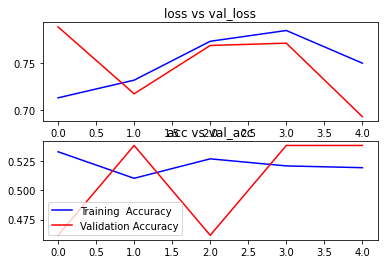

In [78]:
#plotting the loss and accuracy curves
plot2(model2_eff)

In [79]:
#MobileNetV2 architecture
model2_mobile = mobile_model()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_11 (Flatten)        (None, 62720)             0         
                                                                 
 dense_17 (Dense)            (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


In [80]:
#fitting the model
history = model2_mobile.fit(
  train_generator,
      steps_per_epoch=100,  
      epochs=5,
      validation_data=validation_generator,
      validation_batch_size=30,  
      verbose=1)

Epoch 1/5
100/100 [==============================] - 10s 74ms/step - loss: 0.1251 - acc: 0.9581 - val_loss: 0.0532 - val_acc: 0.9808
Epoch 2/5
100/100 [==============================] - 6s 64ms/step - loss: 0.0156 - acc: 0.9950 - val_loss: 0.0878 - val_acc: 0.9846
Epoch 3/5
100/100 [==============================] - 6s 64ms/step - loss: 0.0033 - acc: 0.9990 - val_loss: 0.0577 - val_acc: 0.9885
Epoch 4/5
100/100 [==============================] - 6s 64ms/step - loss: 9.5331e-04 - acc: 1.0000 - val_loss: 0.0691 - val_acc: 0.9885
Epoch 5/5
100/100 [==============================] - 6s 64ms/step - loss: 4.3089e-04 - acc: 1.0000 - val_loss: 0.0917 - val_acc: 0.9846


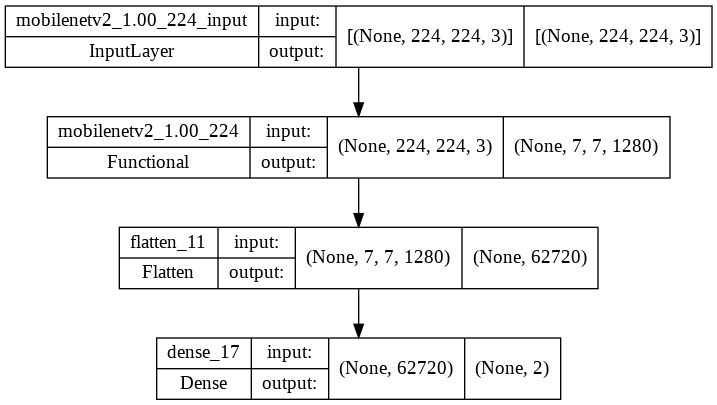

In [81]:
#plotting the model
plot_model(model2_mobile,  show_shapes=True, show_layer_names=True)

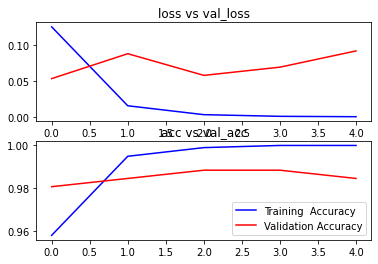

In [82]:
#plotting the loss and accuracy curves
plot2(model2_mobile)

Inferences:
1. The training accuracies of the models are:
* AlexNet  ->0.9440
* VGG-16   -> 0.9778
* GoogleNet->0.9995
* ResNet50 ->0.8213
* EfficientNetB0  ->0.5194
* MobileNetV2     -> 1.0000

2. MobileNetV2 is clearly overfitting the given dataset and can
be observed from the plot as well as its accuracy score.

3. VGG-16 is again performing better than AlexNet.

4. The model having lowest accuracy is again EfficientNetB0



